In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, GlobalAveragePooling2D
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define the path to your dataset
data_path_train = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train"
data_path_val="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val"
# Specify parameters
img_size = (256, 256)
batch_size = 32

# Use ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Create generators for training and validation sets
train_generator = train_datagen.flow_from_directory(
    data_path_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)
validation_generator = val_datagen.flow_from_directory(
    data_path_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bacterial Pneumonia
1 : Corona Virus Disease
2 : Normal
3 : Tuberculosis
4 : Viral Pneumonia


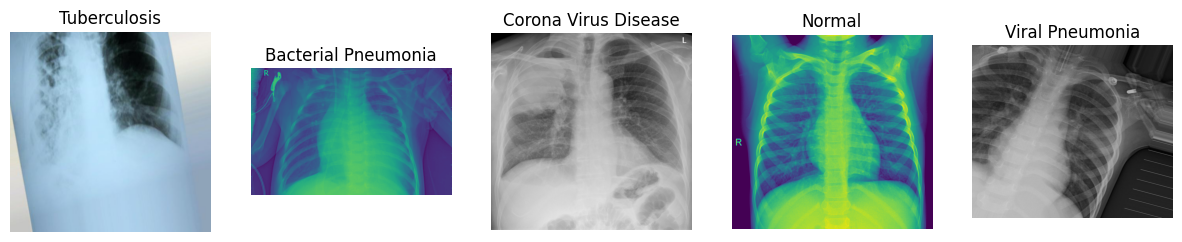

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your dataset
data_path = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/"

# Get the class labels
class_labels = os.listdir(os.path.join(data_path, "train"))

# Create a figure to display images
plt.figure(figsize=(15, 5))

# Loop through each class
for i, label in enumerate(class_labels):
    # Get a list of image file names for the current class
    class_path = os.path.join(data_path, "train", label)
    image_files = os.listdir(class_path)

    # Select a random image from the current class
    random_image = random.choice(image_files)

    # Load the image
    image_path = os.path.join(class_path, random_image)
    image = Image.open(image_path)

    # Plot the image
    plt.subplot(1, len(class_labels), i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.show()


In [ ]:

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the VGG16 base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(train_generator.num_classes, activation='softmax'))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
  1/190 ━━━━━━━━━━━━━━━━━━━━ 2:53:04 55s/step - accuracy: 0.2188 - loss: 2.2490

I0000 00:00:1709376952.697122     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709376952.719228     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


145/190 ━━━━━━━━━━━━━━━━━━━━ 44s 994ms/step - accuracy: 0.7118 - loss: 0.8271

W0000 00:00:1709377095.862594     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 940ms/step - accuracy: 0.7261 - loss: 0.7767

W0000 00:00:1709377132.980292     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


190/190 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.7264 - loss: 0.7758 - val_accuracy: 0.7594 - val_loss: 0.6044
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 165s 845ms/step - accuracy: 0.8061 - loss: 0.4481 - val_accuracy: 0.3150 - val_loss: 3.6801
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 164s 841ms/step - accuracy: 0.8455 - loss: 0.3789 - val_accuracy: 0.8194 - val_loss: 0.4425
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 162s 830ms/step - accuracy: 0.8670 - loss: 0.3235 - val_accuracy: 0.8006 - val_loss: 0.4689
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 164s 837ms/step - accuracy: 0.8643 - loss: 0.3281 - val_accuracy: 0.8323 - val_loss: 0.3921
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 165s 844ms/step - accuracy: 0.8756 - loss: 0.3114 - val_accuracy: 0.8204 - val_loss: 0.4438
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 171s 878ms/step - accuracy: 0.8813 - loss: 0.2828 - val_accuracy: 0.8378 - val_loss: 0.3869
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 177s 906ms/step - accuracy: 0.8787 - loss: 0.2876 

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
data_path_test="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"
test_generator = test_datagen.flow_from_directory(
    data_path_test,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

# Evaluate the model on the test set
results = model.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Found 2025 images belonging to 5 classes.
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.9092 - loss: 0.2520
Test Loss: 0.4664524793624878
Test Accuracy: 0.8276543021202087


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred, target_names=labels.values()))

64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.61      0.89      0.72       403
Corona Virus Disease       0.99      0.95      0.97       407
              Normal       0.86      0.97      0.91       404
        Tuberculosis       0.96      0.99      0.97       408
     Viral Pneumonia       0.81      0.34      0.48       403

            accuracy                           0.83      2025
           macro avg       0.84      0.83      0.81      2025
        weighted avg       0.84      0.83      0.81      2025



64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step


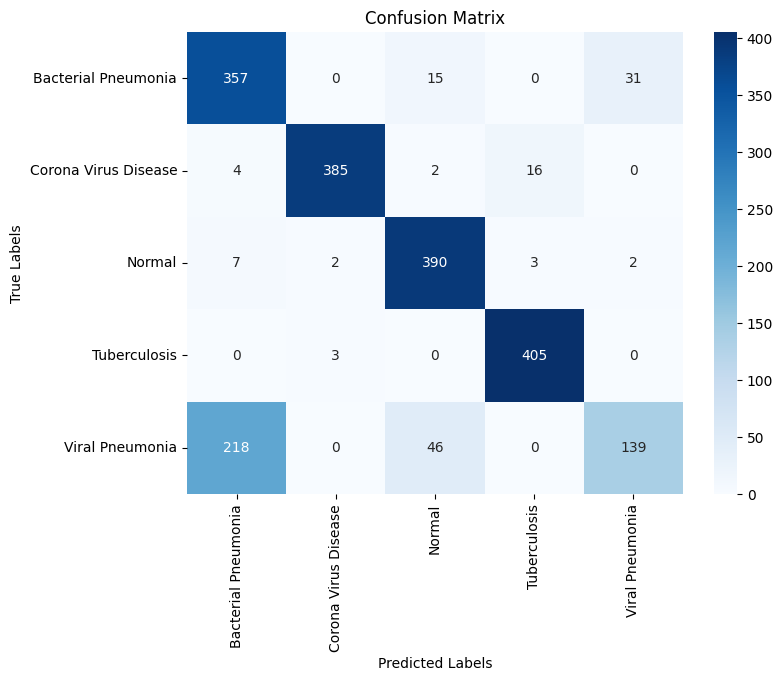

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get the true labels
true_labels = test_generator.classes

# Predict the labels using the model
predictions = model.predict(test_generator)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


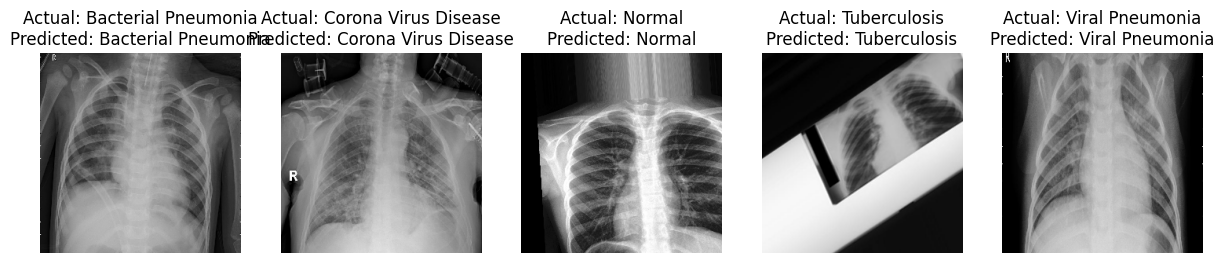

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define a function to get random images from each class along with actual and predicted labels
def get_random_images_with_labels(directory, class_indices, num_images=1):
    images = []
    actual_labels = []
    predicted_labels = []
    for class_name, class_index in class_indices.items():
        class_dir = os.path.join(directory, class_name)
        # Get a random image from the directory of the current class
        random_img_paths = random.sample(os.listdir(class_dir), num_images)
        for img_path in random_img_paths:
            img_path = os.path.join(class_dir, img_path)
            img = image.load_img(img_path, target_size=img_size)
            images.append(img)
            actual_labels.append(class_name)
            # Predict the label for the image
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0  # Rescale pixel values
            img_array = np.expand_dims(img_array, axis=0)
            predicted_label = np.argmax(model.predict(img_array), axis=-1)[0]
            predicted_labels.append(list(test_generator.class_indices.keys())[predicted_label])
    return images, actual_labels, predicted_labels

# Get random images from each class in the test set along with actual and predicted labels
sample_images, actual_labels, predicted_labels = get_random_images_with_labels(data_path_test, test_generator.class_indices, num_images=1)

# Plot the images along with their actual and predicted labels horizontally
plt.figure(figsize=(15, 5))
for i, (img, actual_label, predicted_label) in enumerate(zip(sample_images, actual_labels, predicted_labels)):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')
plt.show()
